In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [68]:
df = pd.read_csv('../DATA/Telco-Customer-Churn.csv')

In [69]:
df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [71]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [72]:
print(len(df))
print(len(df.columns))

7032
21


In [73]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

<AxesSubplot:xlabel='Churn', ylabel='count'>

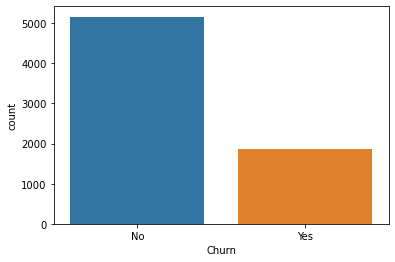

In [74]:
sns.countplot(data = df, x='Churn')

<AxesSubplot:xlabel='Churn', ylabel='TotalCharges'>

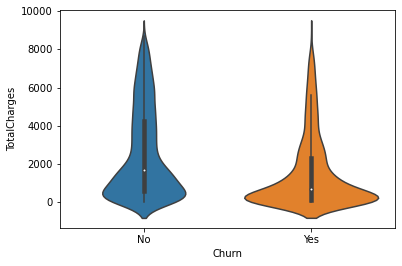

In [75]:
sns.violinplot(data = df,x='Churn',y='TotalCharges')

In [76]:
corr_df  = pd.get_dummies(df[['gender', 'SeniorCitizen', 'Partner', 'Dependents','PhoneService', 'MultipleLines', 'InternetService',
                              'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport','StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
                              'PaymentMethod','Churn']]).corr()
print(corr_df['Churn_Yes'].sort_values().iloc[1:-1])

Contract_Two year                         -0.301552
StreamingMovies_No internet service       -0.227578
StreamingTV_No internet service           -0.227578
TechSupport_No internet service           -0.227578
DeviceProtection_No internet service      -0.227578
OnlineBackup_No internet service          -0.227578
OnlineSecurity_No internet service        -0.227578
InternetService_No                        -0.227578
PaperlessBilling_No                       -0.191454
Contract_One year                         -0.178225
OnlineSecurity_Yes                        -0.171270
TechSupport_Yes                           -0.164716
Dependents_Yes                            -0.163128
Partner_Yes                               -0.149982
PaymentMethod_Credit card (automatic)     -0.134687
InternetService_DSL                       -0.124141
PaymentMethod_Bank transfer (automatic)   -0.118136
PaymentMethod_Mailed check                -0.090773
OnlineBackup_Yes                          -0.082307
DeviceProtec

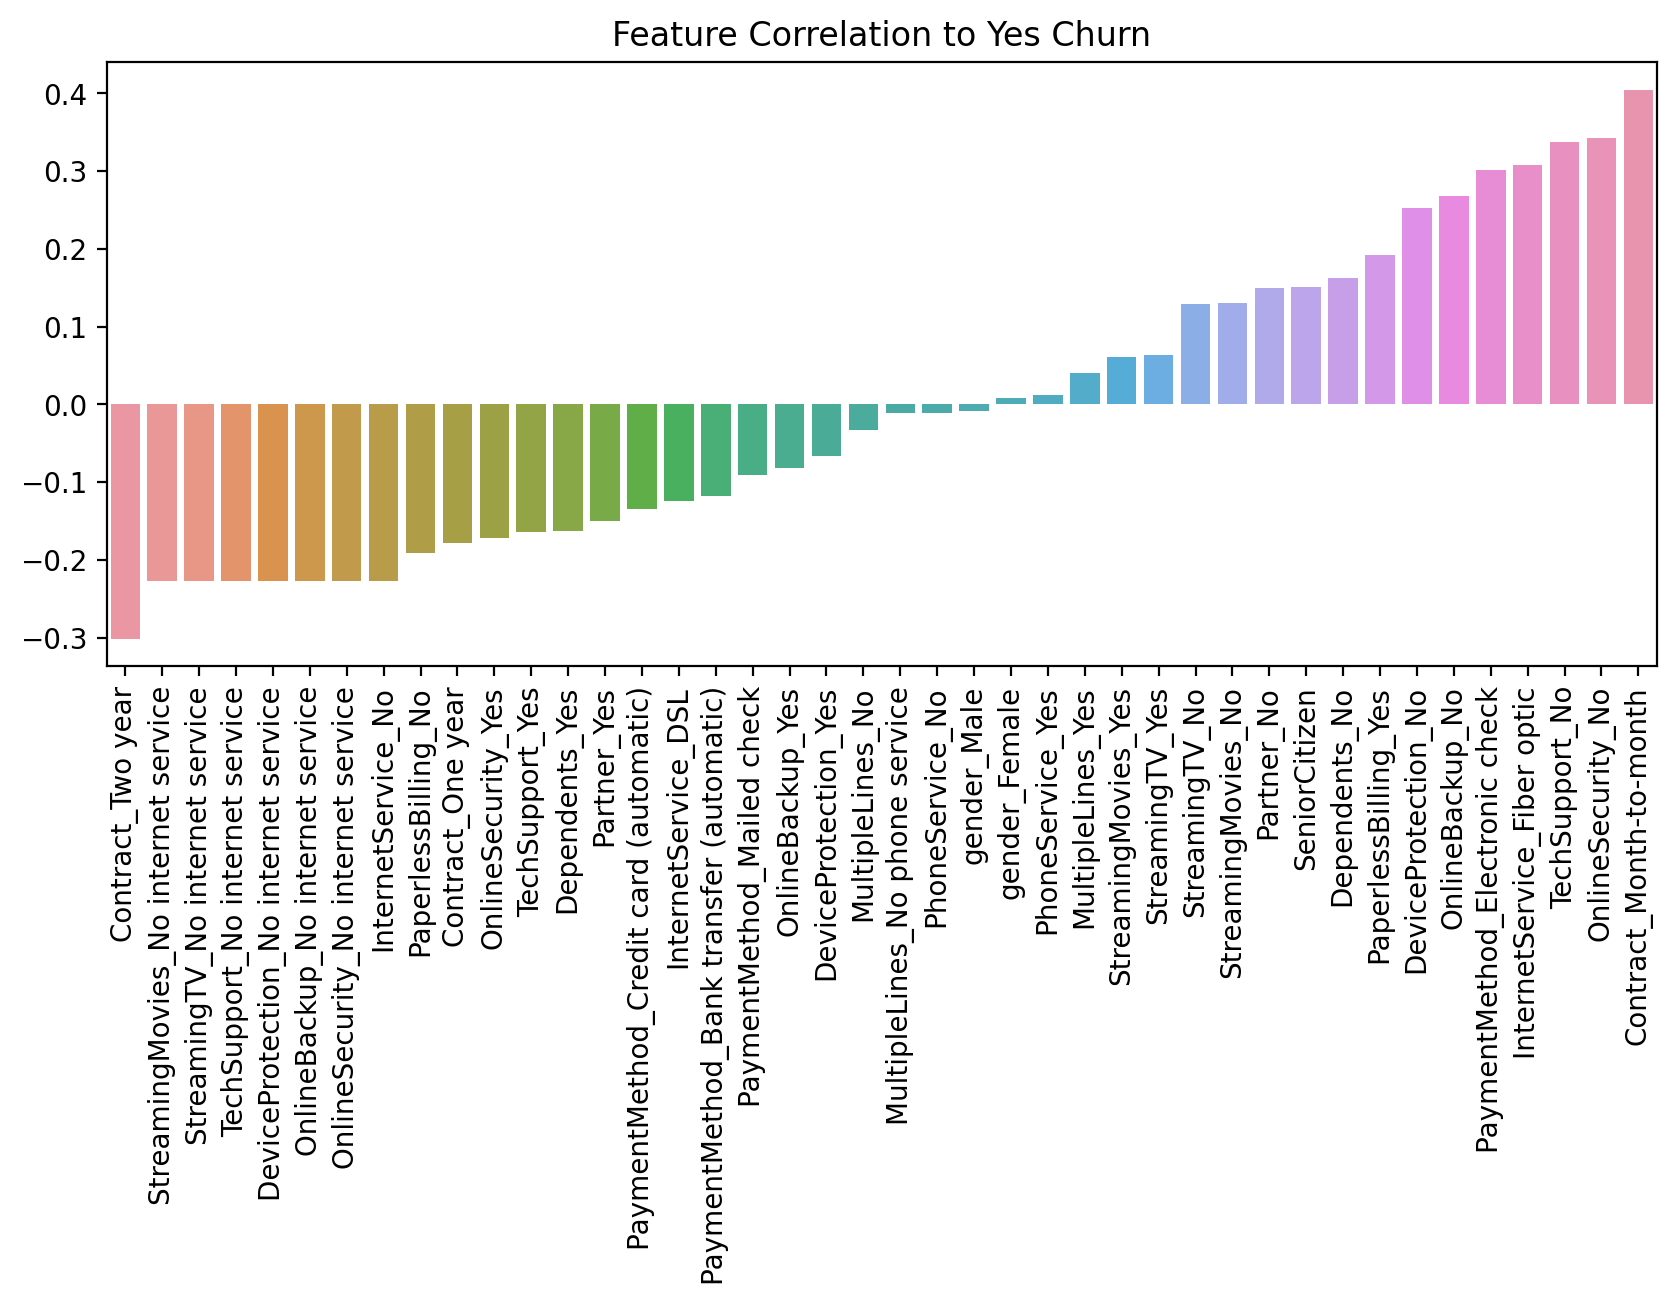

In [77]:
plt.figure(figsize=(10,4),dpi=200)
sns.barplot(x=corr_df['Churn_Yes'].sort_values().iloc[1:-1].index,y=corr_df['Churn_Yes'].sort_values().iloc[1:-1].values)
plt.title("Feature Correlation to Yes Churn")
plt.xticks(rotation=90);

In [78]:
df['Contract'].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

<AxesSubplot:xlabel='tenure', ylabel='Count'>

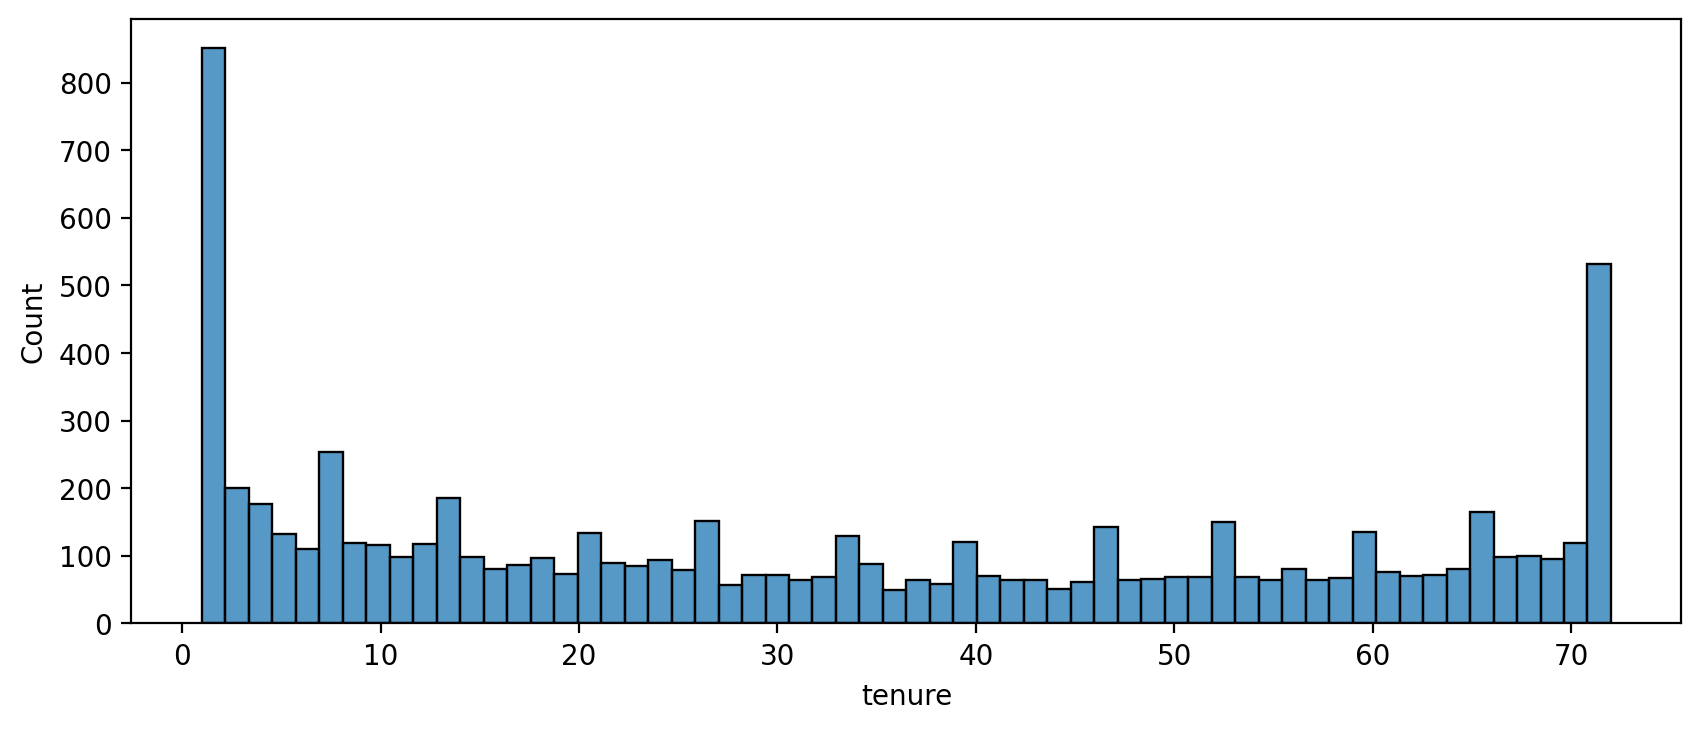

In [79]:
plt.figure(figsize=(10,4),dpi=200)
sns.histplot(data=df,x='tenure',bins=60)

<Figure size 2000x600 with 0 Axes>

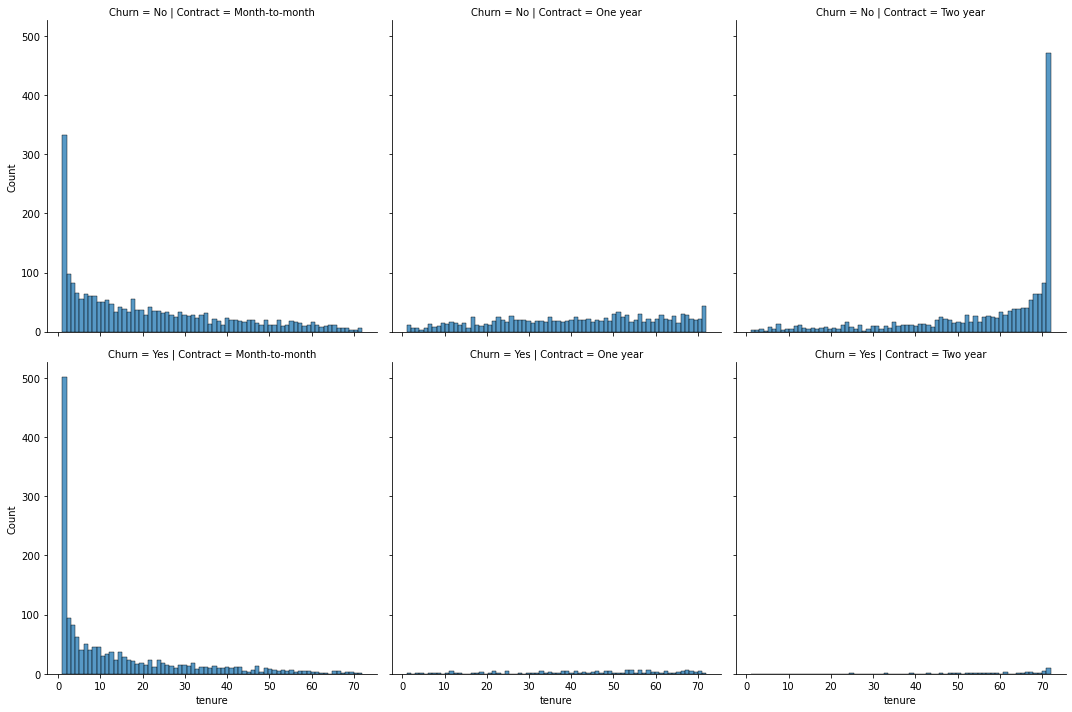

In [80]:
plt.figure(figsize=(10,3),dpi=200)
sns.displot(data=df,x='tenure',bins=70,col='Contract',row='Churn');

<AxesSubplot:xlabel='MonthlyCharges', ylabel='TotalCharges'>

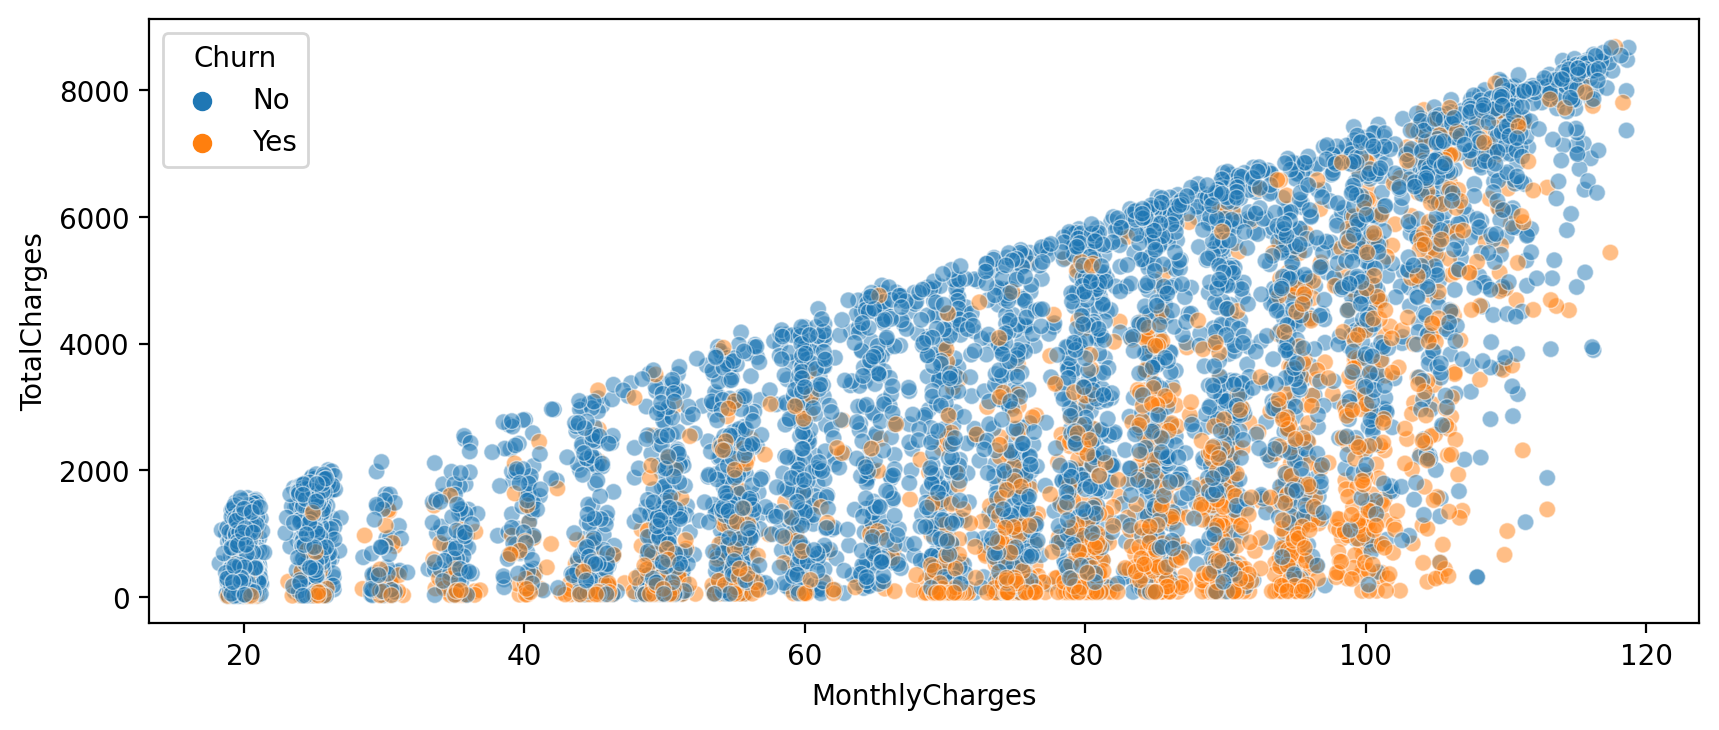

In [81]:
plt.figure(figsize=(10,4),dpi=200)
sns.scatterplot(data=df,x='MonthlyCharges',y='TotalCharges',hue='Churn', linewidth=0.5,alpha=0.5)

In [82]:
no_churn = df.groupby(['Churn', 'tenure']).count().transpose()['No']
yes_churn = df.groupby(['Churn', 'tenure']).count().transpose()['Yes']
churn_rate = 100 * yes_churn / (no_churn + yes_churn)
churn_rate.transpose()['customerID']

tenure
1     61.990212
2     51.680672
3     47.000000
4     47.159091
5     48.120301
        ...    
68     9.000000
69     8.421053
70     9.243697
71     3.529412
72     1.657459
Name: customerID, Length: 72, dtype: float64

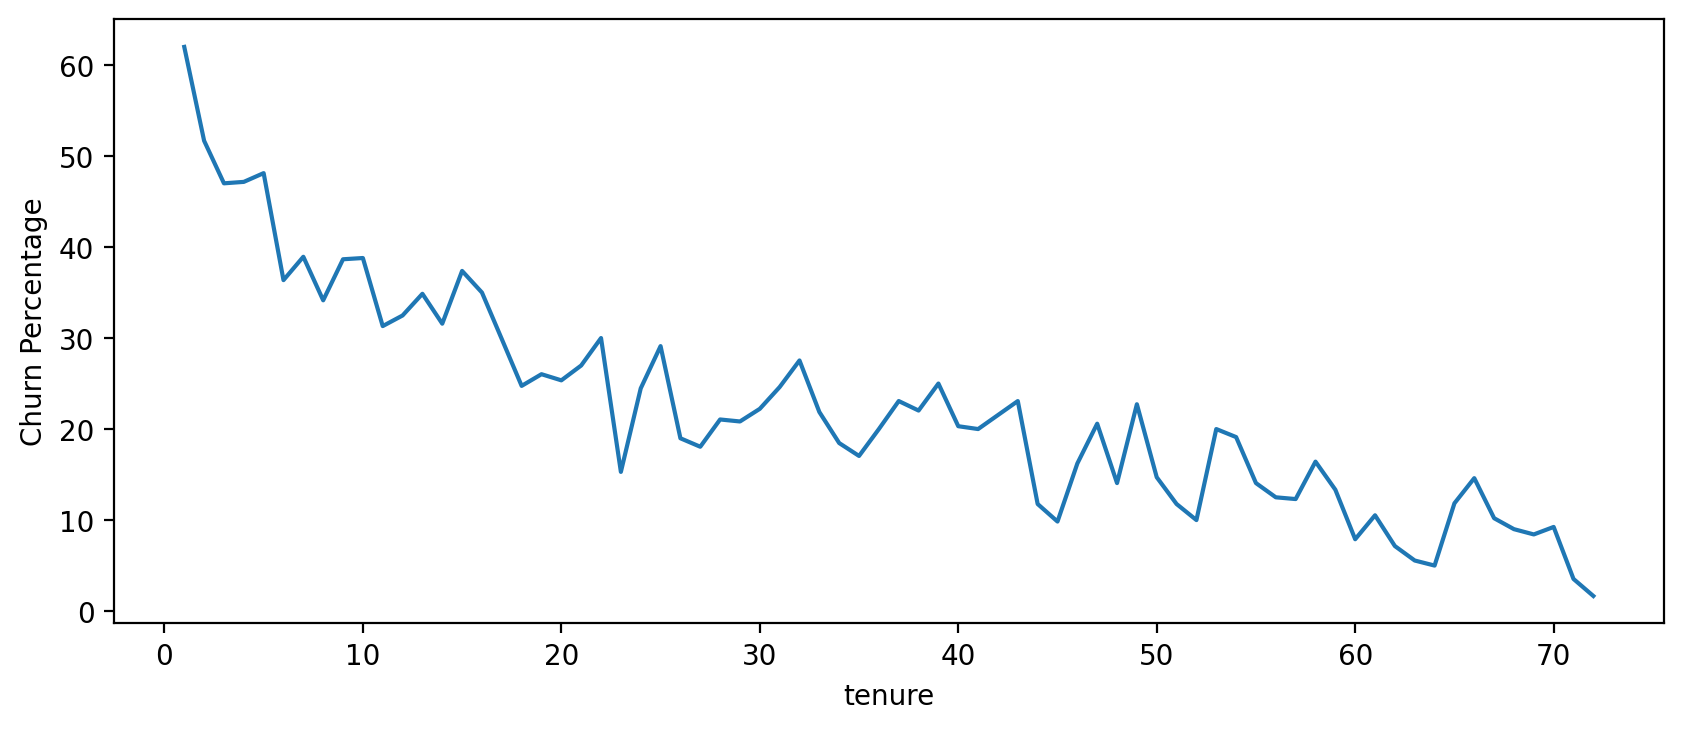

In [83]:
plt.figure(figsize=(10,4),dpi=200)
churn_rate.iloc[0].plot()
plt.ylabel('Churn Percentage');

In [84]:
def cohort(tenure):
    if tenure < 13:
        return '0-12 Months'
    elif tenure < 25:
        return '12-24 Months'
    elif tenure < 49:
        return '24-48 Months'
    else:
        return "Over 48 Months"



In [85]:
df['Tenure Cohort'] = df['tenure'].apply(cohort)
df.head(10)[['tenure', 'Tenure Cohort']]

,tenure,Tenure Cohort
0,1,0-12 Months
1,34,24-48 Months
2,2,0-12 Months
3,45,24-48 Months
4,2,0-12 Months
5,8,0-12 Months
6,22,12-24 Months
7,10,0-12 Months
8,28,24-48 Months
9,62,Over 48 Months


<AxesSubplot:xlabel='MonthlyCharges', ylabel='TotalCharges'>

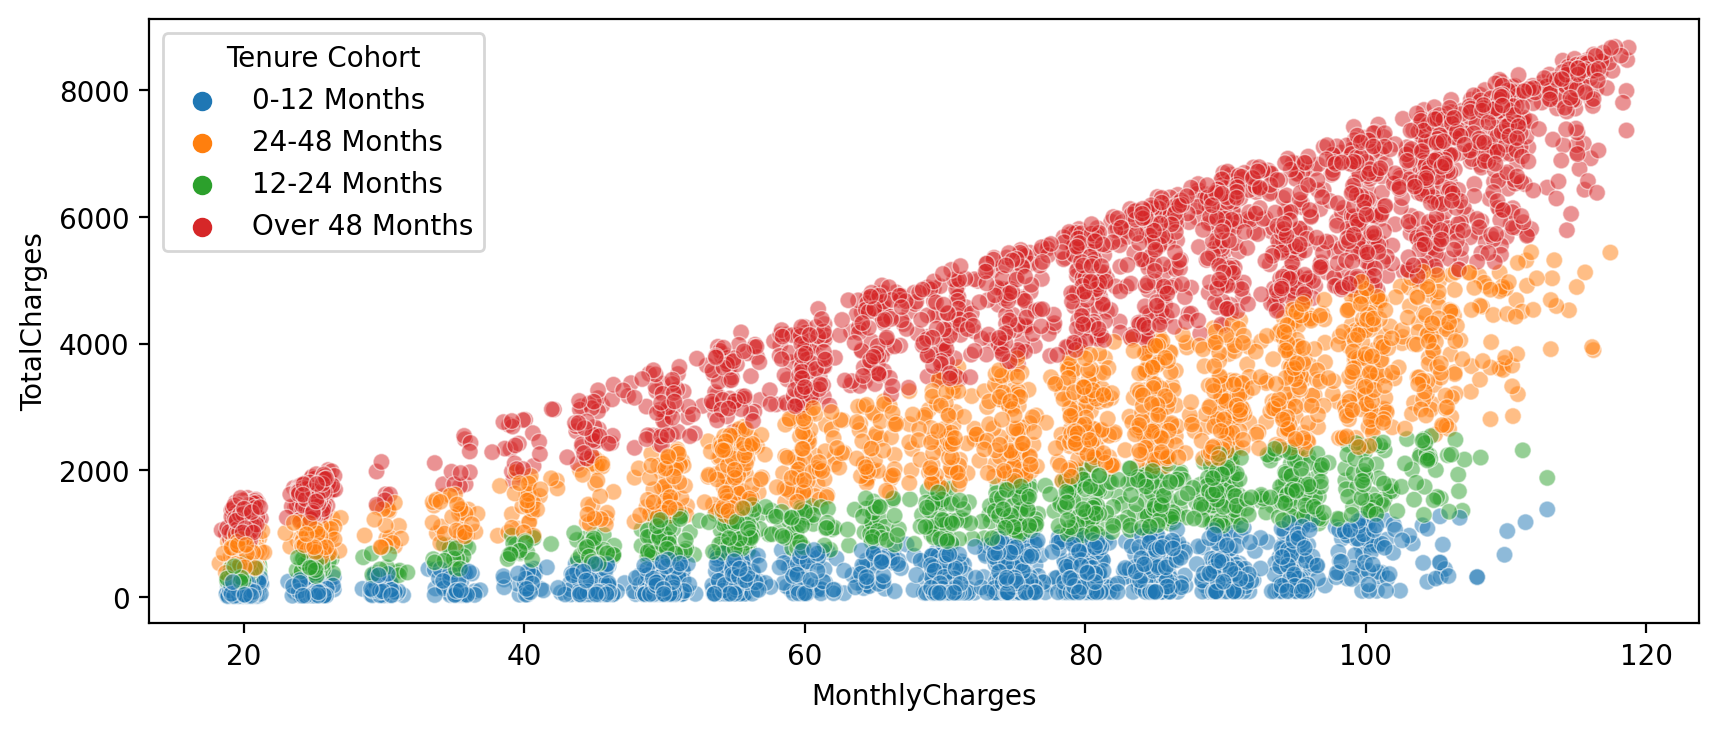

In [86]:
plt.figure(figsize=(10,4),dpi=200)
sns.scatterplot(data=df,x='MonthlyCharges',y='TotalCharges',hue='Tenure Cohort', linewidth=0.5,alpha=0.5)

<AxesSubplot:xlabel='Tenure Cohort', ylabel='count'>

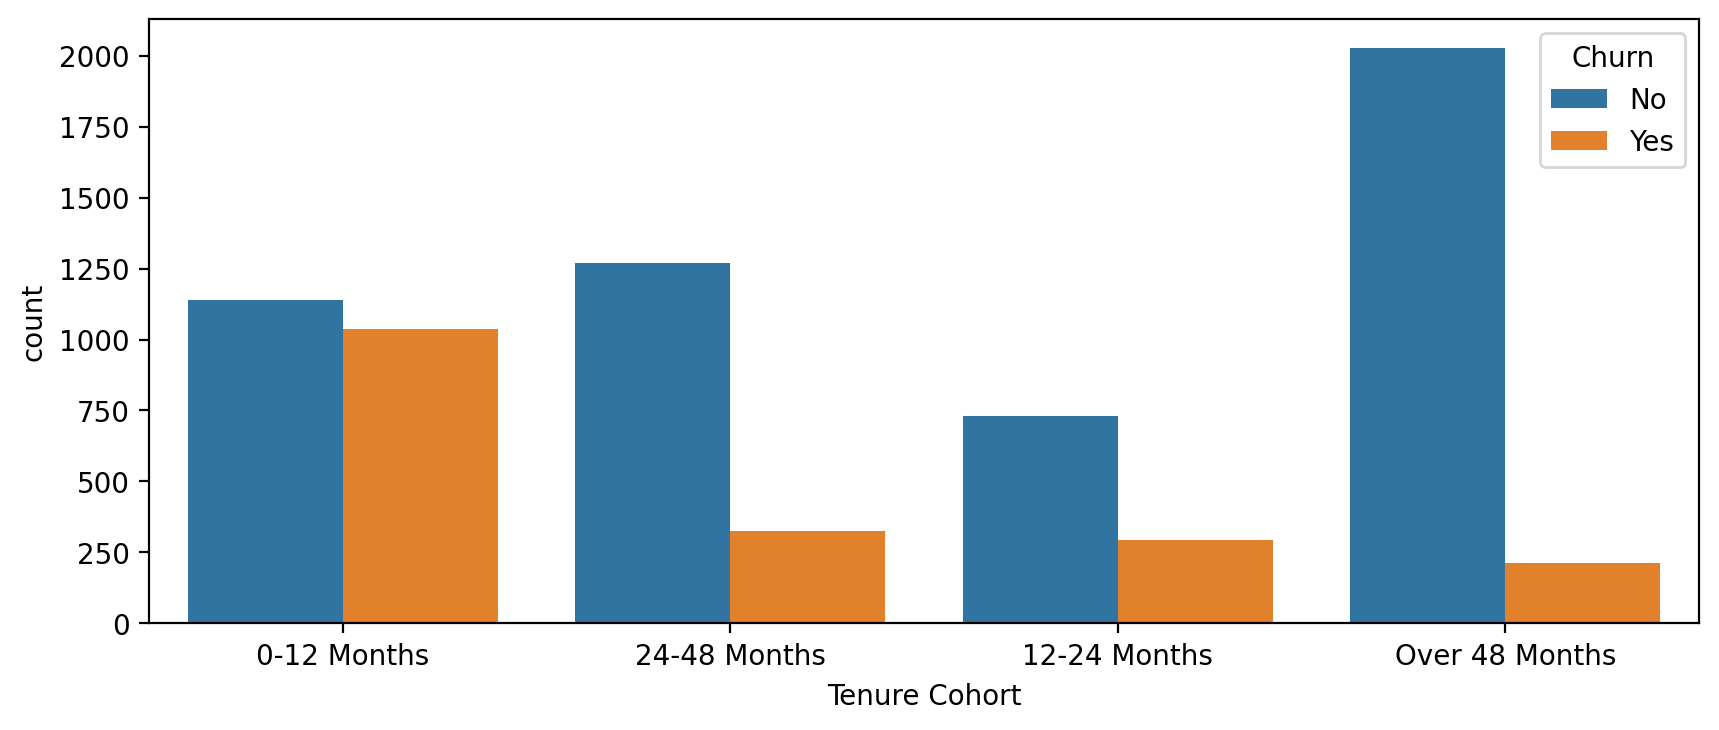

In [87]:
plt.figure(figsize=(10,4),dpi=200)
sns.countplot(data=df,x='Tenure Cohort',hue='Churn')

<Figure size 2000x800 with 0 Axes>

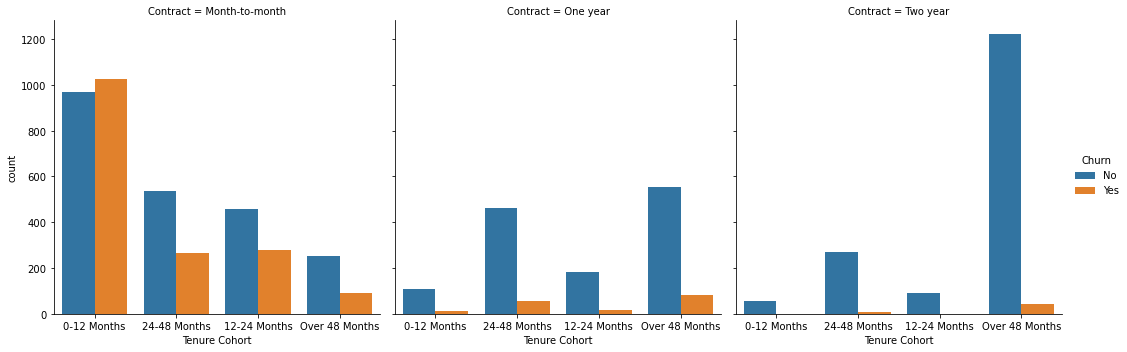

In [88]:
plt.figure(figsize=(10,4),dpi=200)
sns.catplot(data=df,x='Tenure Cohort',hue='Churn',col='Contract',kind='count')

Creating predicitive models

In [89]:
X = df.drop(['Churn','customerID'],axis=1)
X = pd.get_dummies(X,drop_first=True)

In [90]:
y= df['Churn']

In [91]:
from sklearn.model_selection import train_test_split

In [92]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=101)

In [93]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score,plot_confusion_matrix,classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler


In [94]:
scaler = StandardScaler()
scaler.fit(X_train)
scaled_X_train = scaler.transform(X_train)
scaled_X_test =  scaler.transform(X_test)


In [95]:
log_model = LogisticRegression()
C=np.logspace(0, 4, 12)
penalty = ['l1', 'l2', 'elasticnet']
l1_ratio=[0,0.1,0.2,0.5,0.9,0.99,1]
grid_log = GridSearchCV(log_model,param_grid={'C':C,'penalty':penalty,'l1_ratio':l1_ratio})

In [96]:
grid_log.fit(scaled_X_train,y_train)

C:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is 

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e+00, 2.31012970e+00, 5.33669923e+00, 1.23284674e+01,
       2.84803587e+01, 6.57933225e+01, 1.51991108e+02, 3.51119173e+02,
       8.11130831e+02, 1.87381742e+03, 4.32876128e+03, 1.00000000e+04]),
                         'l1_ratio': [0, 0.1, 0.2, 0.5, 0.9, 0.99, 1],
                         'penalty': ['l1', 'l2', 'elasticnet']})

In [97]:
grid_log.best_params_

{'C': 12.32846739442066, 'l1_ratio': 0, 'penalty': 'l2'}

In [98]:
y_pred = grid_log.predict(scaled_X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

          No       0.86      0.91      0.89       799
         Yes       0.67      0.55      0.60       256

    accuracy                           0.82      1055
   macro avg       0.77      0.73      0.75      1055
weighted avg       0.82      0.82      0.82      1055



In [99]:
knn = KNeighborsClassifier()

grid_knn = GridSearchCV(knn,param_grid={'n_neighbors':[1,2,3,4,5,6,7,8,9,10,15]})
grid_knn.fit(scaled_X_train,y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15]})

In [100]:
y_pred_knn = grid_knn.predict(scaled_X_test)
print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

          No       0.86      0.87      0.87       799
         Yes       0.59      0.56      0.58       256

    accuracy                           0.80      1055
   macro avg       0.73      0.72      0.72      1055
weighted avg       0.80      0.80      0.80      1055



In [101]:
svm = SVC()
param_grid = {'kernel':['poly'],'degree':[3,4,5]}
grid_svm = GridSearchCV(svm,param_grid)

grid_svm.fit(scaled_X_train,y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'degree': [3, 4, 5], 'kernel': ['poly']})

In [102]:
y_pred_svm = grid_svm.predict(scaled_X_test)
print(classification_report(y_test,y_pred_svm))

              precision    recall  f1-score   support

          No       0.85      0.92      0.88       799
         Yes       0.67      0.49      0.57       256

    accuracy                           0.82      1055
   macro avg       0.76      0.71      0.73      1055
weighted avg       0.81      0.82      0.81      1055



In [103]:
dt = DecisionTreeClassifier()
grid_dt = GridSearchCV(dt,param_grid={'max_depth':[3,4,5,6,8,None]})
grid_dt.fit(scaled_X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [3, 4, 5, 6, 8, None]})

In [104]:
y_pred_dt = grid_dt.predict(scaled_X_test)
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

          No       0.86      0.88      0.87       799
         Yes       0.59      0.54      0.57       256

    accuracy                           0.80      1055
   macro avg       0.72      0.71      0.72      1055
weighted avg       0.79      0.80      0.79      1055



In [111]:
n_estimators=[64,72,84,90]
max_features= [2,3,4]
bootstrap = [True,False]

param_grid = {'n_estimators':n_estimators,
              'max_features':max_features,
              'bootstrap':bootstrap,
              }

In [112]:
rfc = RandomForestClassifier()
grid_rfc = GridSearchCV(rfc,param_grid)
grid_rfc.fit(scaled_X_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False], 'max_features': [2, 3, 4],
                         'n_estimators': [64, 72, 84, 90]})

In [113]:
grid_rfc.best_params_

{'bootstrap': True, 'max_features': 2, 'n_estimators': 84}

In [114]:
y_pred_rfc = grid_rfc.predict(scaled_X_test)
print(classification_report(y_test,y_pred_rfc))

              precision    recall  f1-score   support

          No       0.84      0.90      0.87       799
         Yes       0.59      0.46      0.52       256

    accuracy                           0.79      1055
   macro avg       0.72      0.68      0.70      1055
weighted avg       0.78      0.79      0.78      1055



In [108]:
ada_model = AdaBoostClassifier()
param_grid = {'n_estimators':[30,50,70,90]}
grid_ada = GridSearchCV(ada_model, param_grid)
grid_ada.fit(scaled_X_train,y_train)

GridSearchCV(estimator=AdaBoostClassifier(),
             param_grid={'n_estimators': [30, 50, 70, 90]})

In [115]:
y_pred_ada = grid_rfc.predict(scaled_X_test)
print(classification_report(y_test,y_pred_ada))

              precision    recall  f1-score   support

          No       0.84      0.90      0.87       799
         Yes       0.59      0.46      0.52       256

    accuracy                           0.79      1055
   macro avg       0.72      0.68      0.70      1055
weighted avg       0.78      0.79      0.78      1055



In [116]:
grid_ada.best_params_

{'n_estimators': 30}